# Wrange

We will start with mall_customers database. 

- acquire: verify our acquire module is working
- summarize our data
- plot histograms + boxplots
- na's
- outliers
- astype()
- pd.cut()

## Acquire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [2]:
df = acquire.get_mall_data()

## Summarize

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:

df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

**Takeaways**

1. encode gender
2. drop customer_id
3. define our target variable: spending_score

In [7]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [8]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Takeaways**
1. Not sure how annual income is computed, or what units it is in. 
2. I don't know what spending score means, I assuming higher spending score means more likely to spend, better to market to? 

### Plot distributions

Histograms

In [10]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

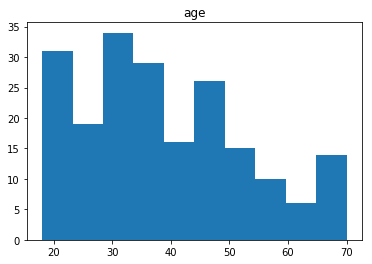

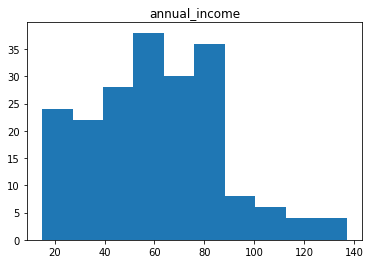

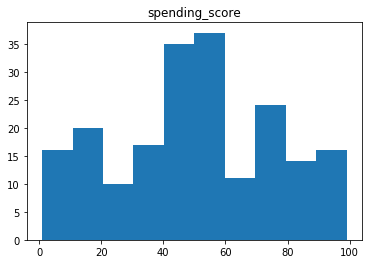

In [12]:
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Boxplots

 nulls, outliers, cut, dropna, fillna, replace, get_dummies
( think about if any new features to compute)
 train, validate, test split
 update prepare.py file to make necessary changes